<a href="https://colab.research.google.com/github/calhall4892/titanic-analysis/blob/main/Titanic_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The sinking of the titanic remains to this day one of the most infamous events in history. The tragic loss of life has captivated the world for over a century now. This dataset presents a an opportunity to understand data science and machine learning in further detail.

In [ ]:
# setup code

import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
print('Setup complete')

file = '/content/drive/MyDrive/Future prospects/Google/Kaggle Comp/train.csv'
titanic_train = pd.read_csv(file)
titanic_train.head()

Mounted at /content/drive
Setup complete


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# github setup

!git clone https://github.com/calhall4892/titanic-analysis

Cloning into 'titanic-analysis'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 94.69 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Manipulating the data (Practice)

## Age Analysis

In [ ]:
# checking the column names

titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# looking at mean age of survivors

mean_age = titanic_train[titanic_train['Survived'] == 1]['Age'].mean()
print(mean_age)

28.343689655172415


In [ ]:
# looking at mean death age

mean_age_died = titanic_train[titanic_train['Survived'] == 0]['Age'].mean()
print(mean_age_died)

30.62617924528302


Text(0.5, 1.0, 'Age and Fare distribution')

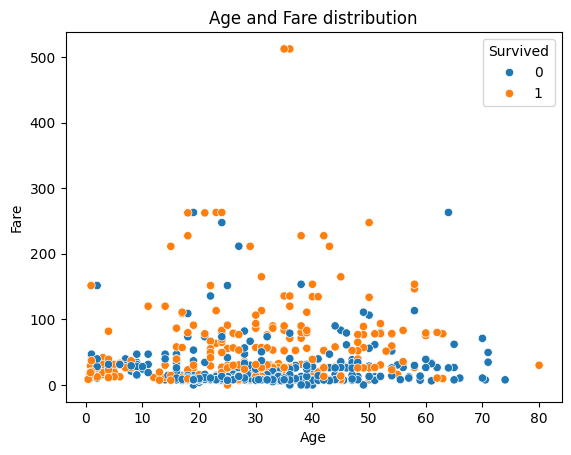

In [ ]:
# age and fare distribution

sbsc = sns.scatterplot(x = 'Age', y = 'Fare', hue = 'Survived', data = titanic_train)
plt.title('Age and Fare distribution')

In [ ]:
survivors_1 = titanic_train[titanic_train['Survived'] == 1]
survivors_0 = titanic_train[titanic_train['Survived'] == 0]
fig, axs = plt.subplots(2,1)
axs[0].set_title('Survived')
axs[1].set_title('Deceased')
fig.tight_layout(h_pad=3)
fig.suptitle('Survivors and Deceased by ages', y = 1.05)
sur1 = sns.histplot(survivors_1['Age'], kde = False, bins = 40, color = 'blue', ax = axs[0])
sur0 = sns.histplot(survivors_0['Age'], kde = False, bins = 40, color = 'red', ax = axs[1])

plt.subplot()

NameError: name 'titanic_train' is not defined

## Class Analysis

In [ ]:
# class analysis survivors per class

class_sur_1 = titanic_train[(titanic_train['Survived'] == 1)
& (titanic_train['Pclass'] == 1)]['Pclass'].value_counts()

class_sur_2 = titanic_train[(titanic_train['Survived'] == 1)
& (titanic_train['Pclass'] == 2)].Pclass.value_counts()

class_sur_3 = titanic_train[(titanic_train['Survived'] == 1)
& (titanic_train['Pclass'] == 3)].Pclass.value_counts()

print(class_sur_1, class_sur_2, class_sur_3)

Pclass
1    136
Name: count, dtype: int64 Pclass
2    87
Name: count, dtype: int64 Pclass
3    119
Name: count, dtype: int64


In [ ]:
#titanic_train['']

KeyError: ''

In [ ]:
sur_by_sex_class = titanic_train.groupby('Pclass')['Survived'].value_counts(normalize = True)
print(sur_by_sex_class)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [ ]:
sur_by_sex_class

In [ ]:
sur_by_sex_class = pd.DataFrame(sur_by_sex_class, columns = ['Pclass', 'Survived', 'proportion'])
sur_by_sex_class.head()

Pclass Survived  proportion
Pclass Survived                            
1      1           NaN      NaN    0.629630
       0           NaN      NaN    0.370370
2      0           NaN      NaN    0.527174
       1           NaN      NaN    0.472826
3      0           NaN      NaN    0.757637

ValueError: Index contains duplicate entries, cannot reshape